<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Assignment: Notebook for Peer Assignment</font></h1>

# Introduction

Using this Python notebook you will:
1. Understand 3 Chicago datasets  
1. Load the 3 datasets into 3 tables in a Db2 database
1. Execute SQL queries to answer assignment questions 

## Understand the datasets 
To complete the assignment problems in this notebook you will be using three datasets that are available on the city of Chicago's Data Portal:
1. <a href="https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2">Socioeconomic Indicators in Chicago</a>
1. <a href="https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t">Chicago Public Schools</a>
1. <a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">Chicago Crime Data</a>

### 1. Socioeconomic Indicators in Chicago
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

For this assignment you will use a snapshot of this dataset which can be downloaded from:
https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at:
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



### 2. Chicago Public Schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

For this assignment you will use a snapshot of this dataset which can be downloaded from:
https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at:
https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t




### 3. Chicago Crime Data 

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. 

This dataset is quite large - over 1.5GB in size with over 6.5 million rows. For the purposes of this assignment we will use a much smaller sample of this dataset which can be downloaded from:
https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at:
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2


### Download the datasets
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the links below to download and save the datasets (.CSV files):
1. __CENSUS_DATA:__ https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv
1. __CHICAGO_PUBLIC_SCHOOLS__  https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv
1. __CHICAGO_CRIME_DATA:__ https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv

__NOTE:__ Ensure you have downloaded the datasets using the links above instead of directly from the Chicago Data Portal. The versions linked here are subsets of the original datasets and have some of the column names modified to be more database friendly which will make it easier to complete this assignment.

### Store the datasets in database tables
To analyze the data using SQL, it first needs to be stored in the database.

While it is easier to read the dataset into a Pandas dataframe and then PERSIST it into the database as we saw in Week 3 Lab 3, it results in mapping to default datatypes which may not be optimal for SQL querying. For example a long textual field may map to a CLOB instead of a VARCHAR. 

Therefore, __it is highly recommended to manually load the table using the database console LOAD tool, as indicated in Week 2 Lab 1 Part II__. The only difference with that lab is that in Step 5 of the instructions you will need to click on create "(+) New Table" and specify the name of the table you want to create and then click "Next". 

<img src = "https://ibm.box.com/shared/static/uc4xjh1uxcc78ks1i18v668simioz4es.jpg">

##### Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the first dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new tables as folows:
1. __CENSUS_DATA__
1. __CHICAGO_PUBLIC_SCHOOLS__
1. __CHICAGO_CRIME_DATA__

### Connect to the database 
Let us first load the SQL extension and establish a connection with the database

In [1]:
%load_ext sql

In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance in first lab in Week 3. From the __uri__ field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

<img src ="https://ibm.box.com/shared/static/hzhkvdyinpupm2wfx49lkr71q9swbpec.jpg">

In [5]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
%sql ibm_db_sa://swf94435:qll%2B41j91k5kgl7b@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: swf94435@BLUDB'

## Problems
Now write and execute SQL queries to solve assignment problems

### Problem 1

##### Find the total number of crimes recorded in the CRIME table

In [8]:
%sql select count(id) from crime


 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
533


### Problem 2

##### Retrieve first 10 rows from the CRIME table


In [9]:
%sql select * from crime limit 10

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,02/10/2018 03:50:01 PM,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,02/28/2018 03:56:25 PM,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,02/10/2018 03:50:01 PM,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,02/10/2018 03:50:01 PM,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,02/10/2018 03:50:01 PM,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),FALSE,FALSE,1323,12,27,24,6,1171668,1905607,2010,02/10/2018 03:50:01 PM,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,1713,17,33,14,6,1154133,1933314,2016,02/10/2018 03:50:01 PM,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,12/16/2005 04:45:00 PM,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,TRUE,FALSE,213,2,3,38,6,1180448,1879234,2005,02/28/2018 03:56:25 PM,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,01/28/2005 05:00:00 PM,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,2211,22,19,72,6,1160129,1838040,2005,02/28/2018 03:56:25 PM,41.71128051,-87.68917910,"(41.711280513, -87.689179097)"
3324217,HK361551,05/13/2004 02:15:00 PM,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,FALSE,FALSE,1733,17,35,21,6,1153590,1921084,2004,02/28/2018 03:56:25 PM,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


### Problem 3

##### How many crimes involve an arrest?

In [12]:
%sql select count(*) from crime where arrest="TRUE"

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
163


### Problem 4

##### Which unique types of crimes have been recorded at GAS STATION locations?


In [21]:
%sql select distinct primary_type from crime where location_description = 'GAS STATION'

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


primary_type
CRIMINAL TRESPASS
NARCOTICS
ROBBERY
THEFT


Hint: Which column lists types of crimes e.g. THEFT?

### Problem 5

##### In the CENUS_DATA table list all Community Areas whose names start with the letter ‘B’.

In [22]:
%sql select community_area_name from soceco where community_area_name like 'B%'

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Belmont Cragin
Burnside
Brighton Park
Bridgeport
Beverly


### Problem 6

##### Which schools in Community Areas 10 to 15 are healthy school certified?

In [32]:
%sql select name_of_school as Certified from schools where community_area_number between 10 and 15 and healthy_school_certified ='Yes'

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


certified
Rufus M Hitch Elementary School


### Problem 7

##### What is the average school Safety Score? 

In [33]:
%sql select avg(safety_score) from schools

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
49.504873


### Problem 8

##### List the top 5 Community Areas by average College Enrollment [number of students] 

In [37]:
%sql select community_area_name from schools order by average_student_attendance limit 5

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
NEAR WEST SIDE
MORGAN PARK
WASHINGTON PARK
DOUGLAS
HUMBOLDT PARK


### Problem 9

##### Use a sub-query to determine which Community Area has the least value for school Safety Score? 

In [39]:
%sql select community_area_name from schools where safety_score = (select min(safety_score) from schools)

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
WASHINGTON PARK


### Problem 10

##### [Without using an explicit JOIN operator] Find the Per Capita Income of the Community Area which has a school Safety Score of 1.

In [44]:
%sql select per_capita_income from soceco, schools where soceco.community_area_number = schools.community_area_number and schools.safety_score=1

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


per_capita_income
13785


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).


In [56]:
data = %sql select per_capita_income as "Per Capita Income", hardship_index as "Hardship Index" from soceco order by hardship_index
data

 * ibm_db_sa://swf94435:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


Per Capita Income,Hardship Index
88669,1
71551,2
65526,3
60058,5
57123,6
59077,7
40959,8
43198,10
44164,11
39523,12


In [65]:
dataframe= data.DataFrame()


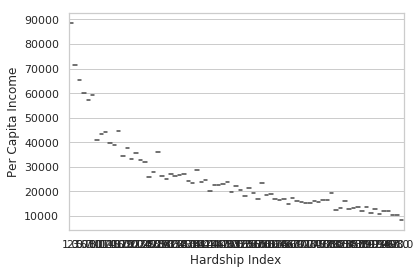

In [77]:
plot=sns.violinplot(y='Per Capita Income', x='Hardship Index', data=dataframe)

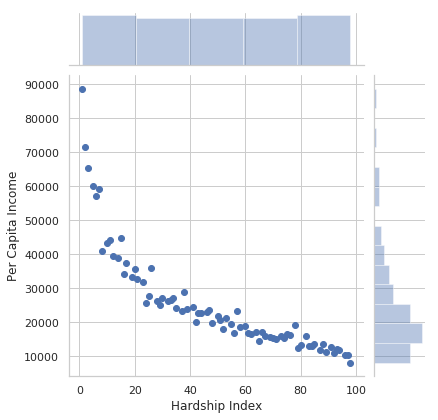

In [76]:
plot=sns.jointplot(y='Per Capita Income', x='Hardship Index', data=dataframe)

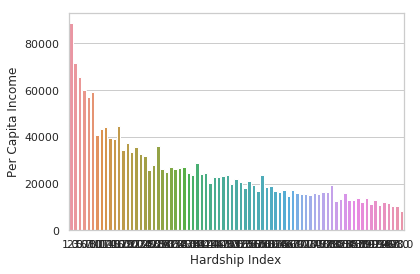

In [74]:
plot=sns.barplot(y='Per Capita Income', x='Hardship Index', data=dataframe)

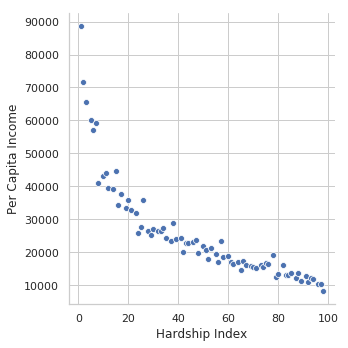

In [75]:
plot=sns.relplot(y='Per Capita Income', x='Hardship Index', data=dataframe)